In [134]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
from scipy.signal import find_peaks as fpeaks

08_5_10


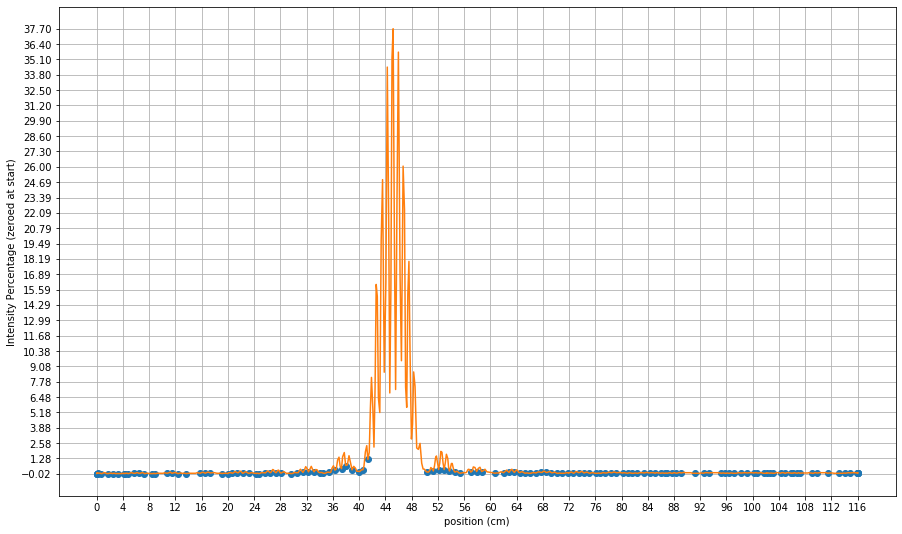

Previous threshold = 0.8533901098901282
New Threshold = .7


<Figure size 432x288 with 0 Axes>

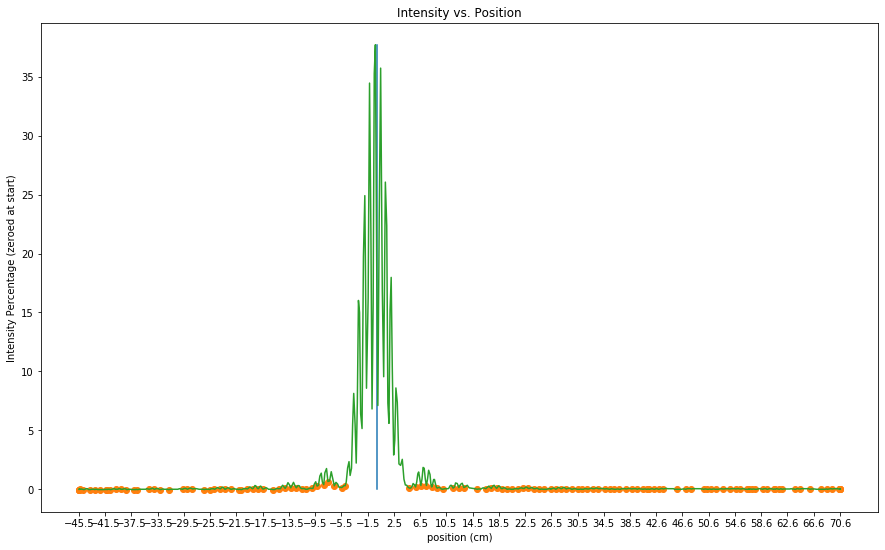

45.5083324375
Is this half point correct? (y/n)y
08_5_1


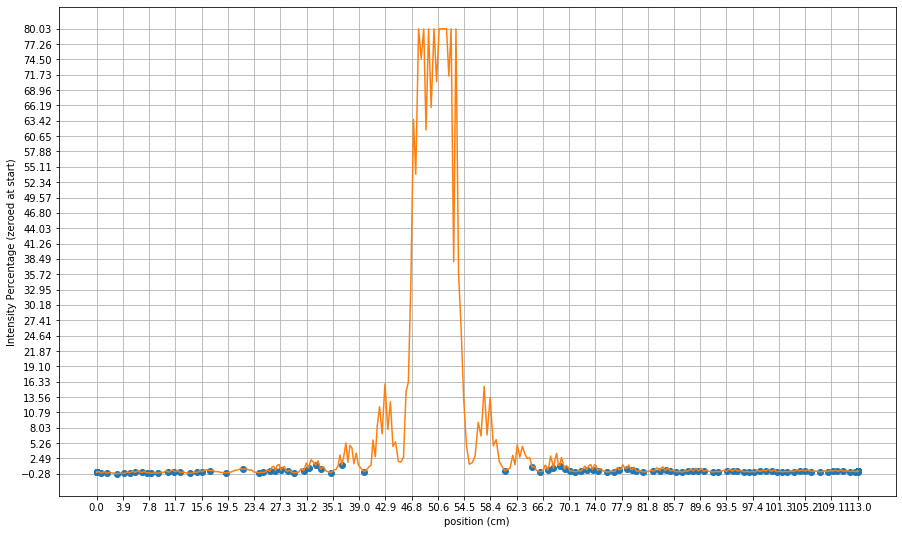

Previous threshold = 0.7802192673991899
New Threshold = 1


<Figure size 432x288 with 0 Axes>

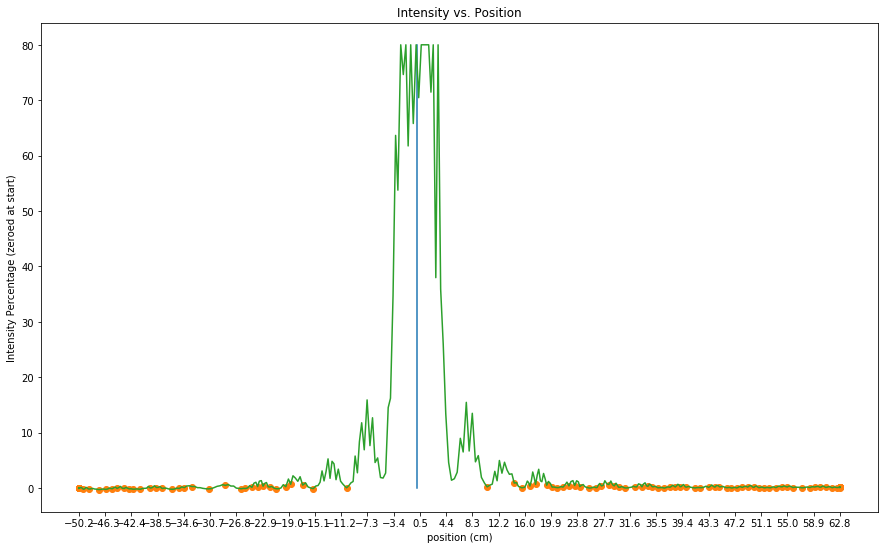

50.18616567875
Is this half point correct? (y/n)y
04_25_10


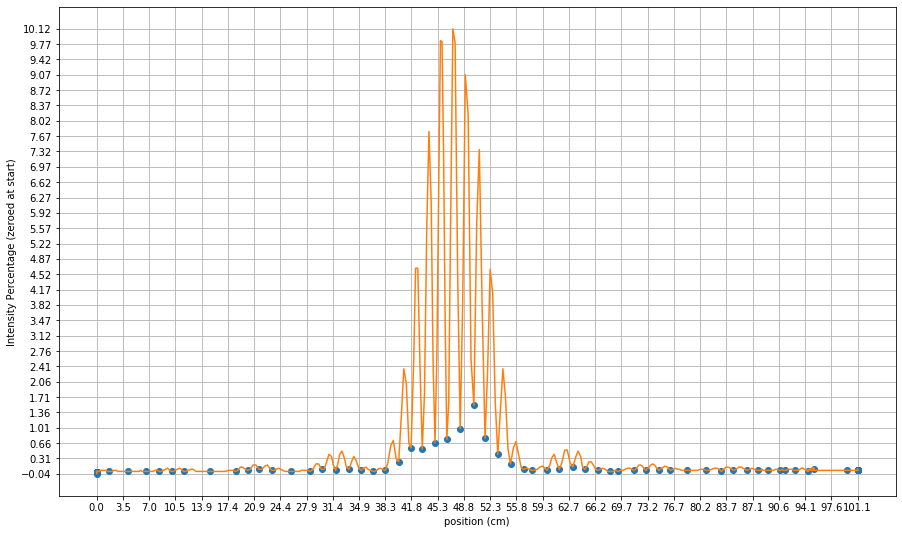

Previous threshold = 1.13422095238135
New Threshold = .29


<Figure size 432x288 with 0 Axes>

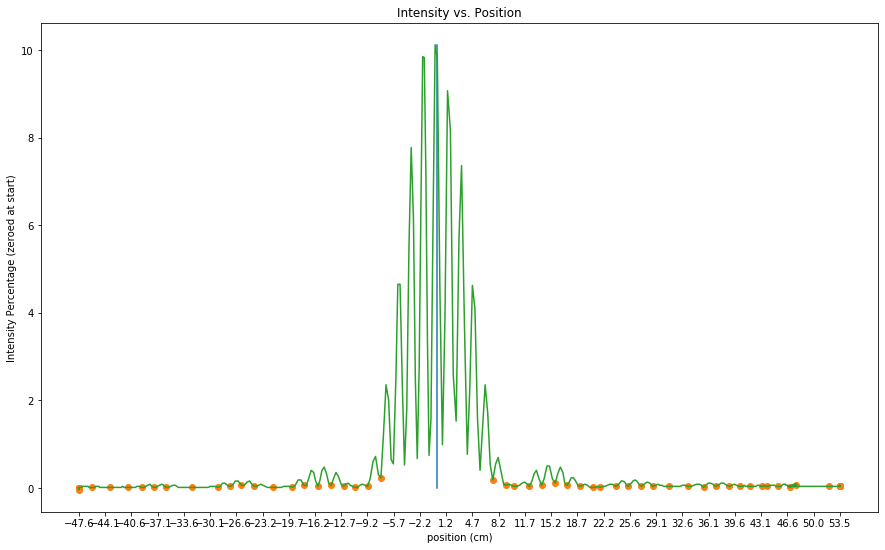

47.56149906375
Is this half point correct? (y/n)y
04_25_1


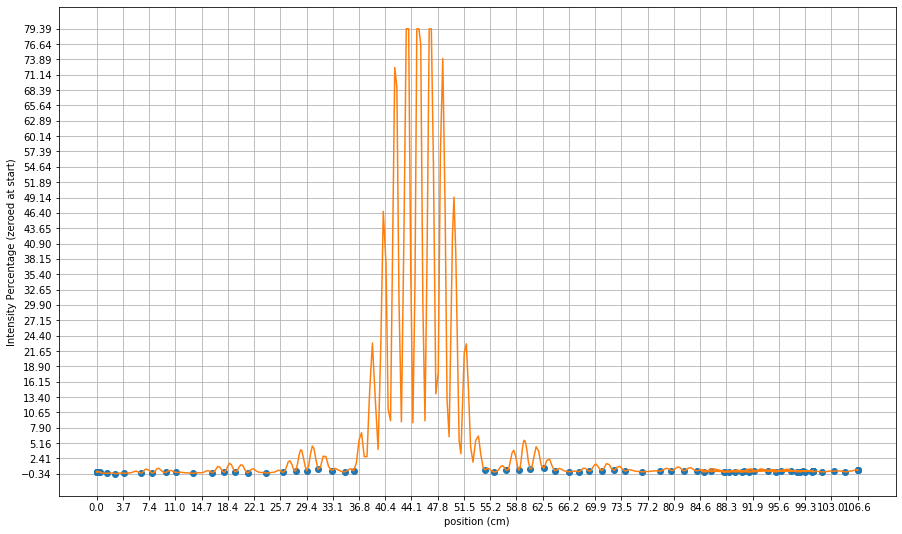

Previous threshold = 0.93767912087881
New Threshold = 5


<Figure size 432x288 with 0 Axes>

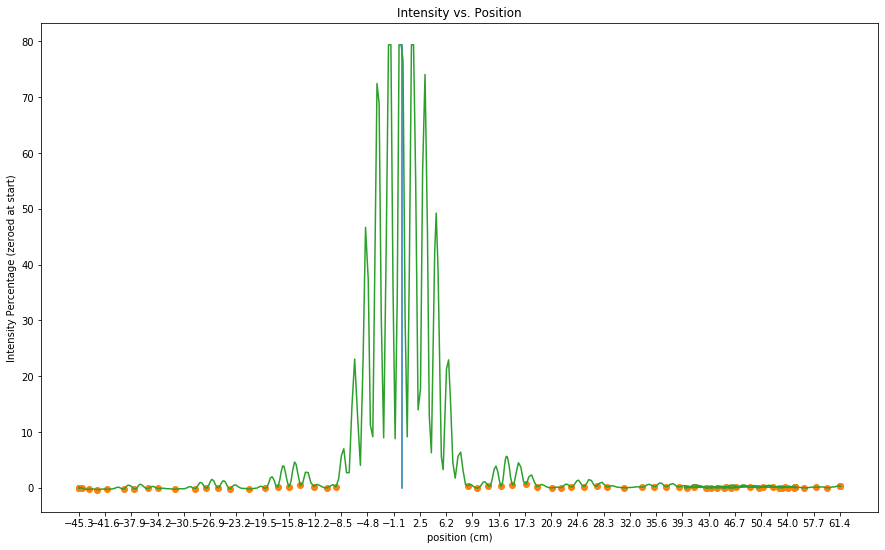

45.2543324425
Is this half point correct? (y/n)y
04_50_10


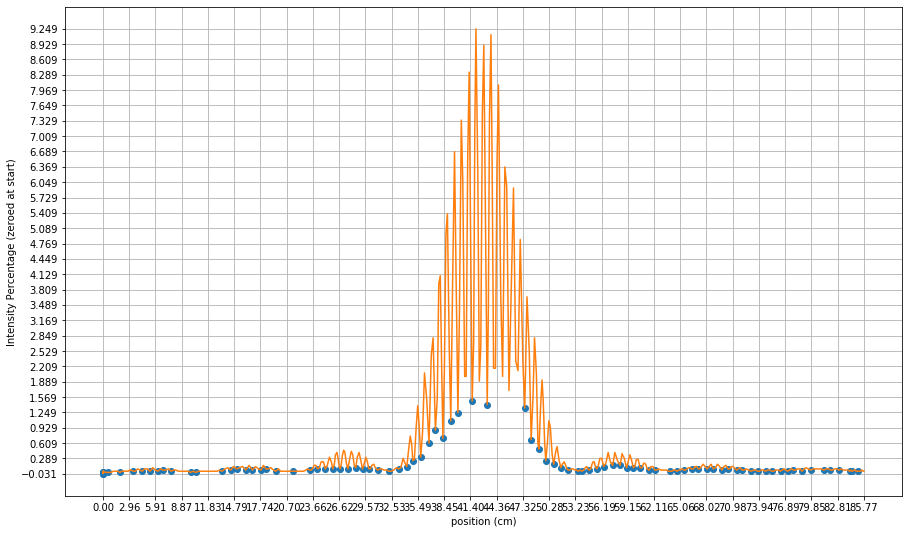

Previous threshold = 1.0121207326009
New Threshold = .28


<Figure size 432x288 with 0 Axes>

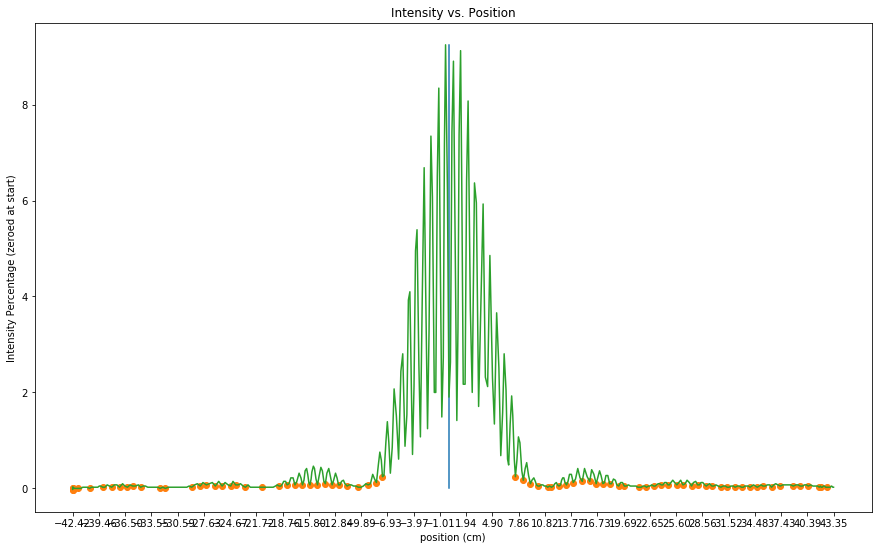

42.417999165
Is this half point correct? (y/n)y
04_50_1


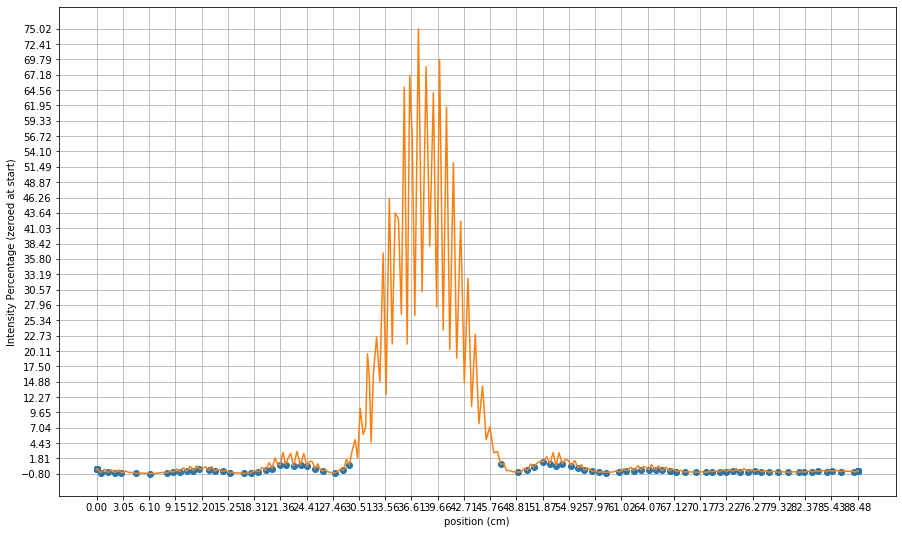

Previous threshold = 0.76830476190448
New Threshold = 5


<Figure size 432x288 with 0 Axes>

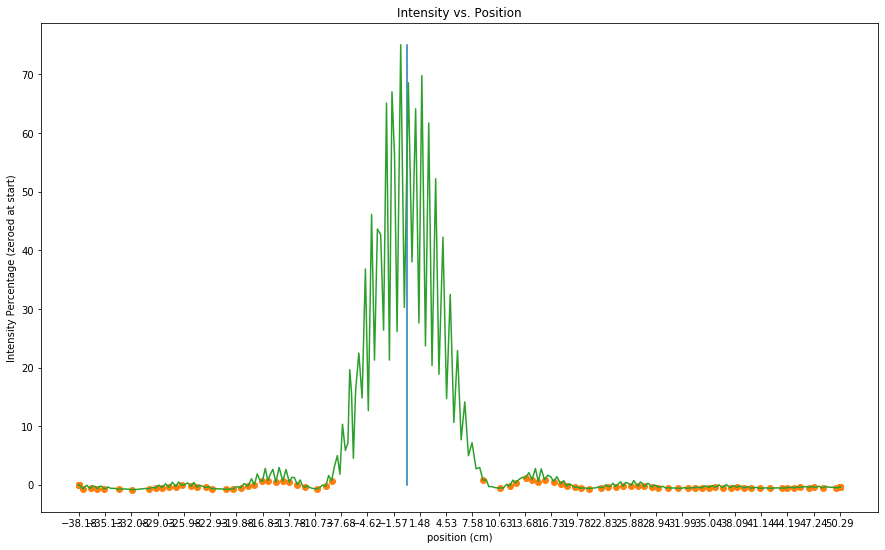

38.184665915
Is this half point correct? (y/n)y
08_25_10


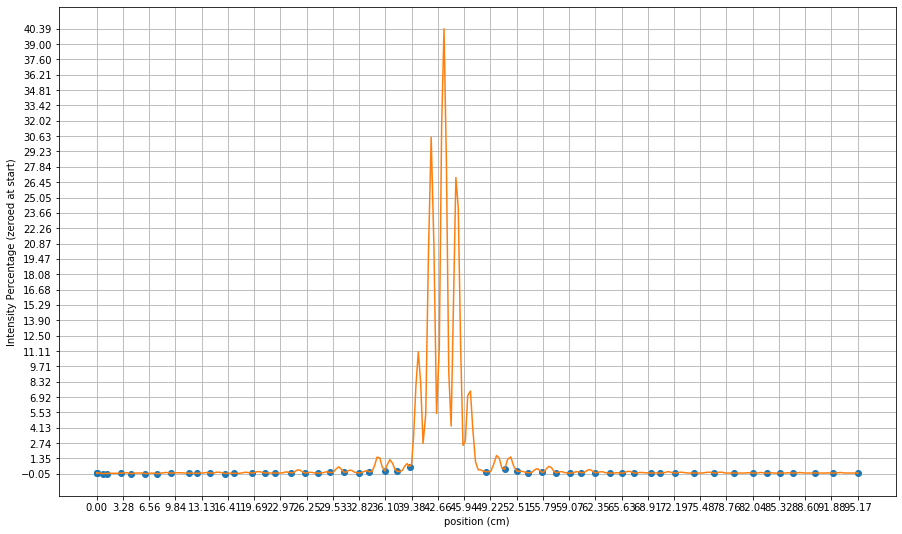

Previous threshold = 0.9632809523809664
New Threshold = .5


<Figure size 432x288 with 0 Axes>

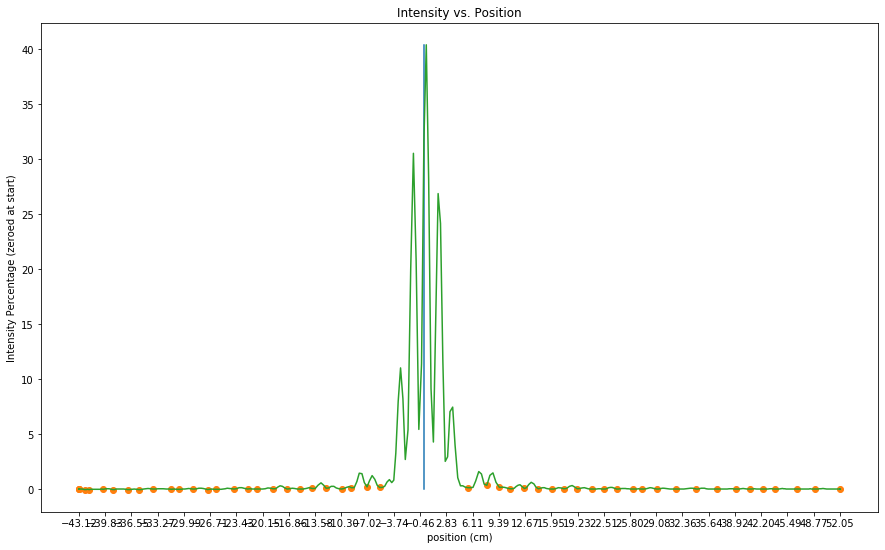

43.11649915125
Is this half point correct? (y/n)y
08_25_1


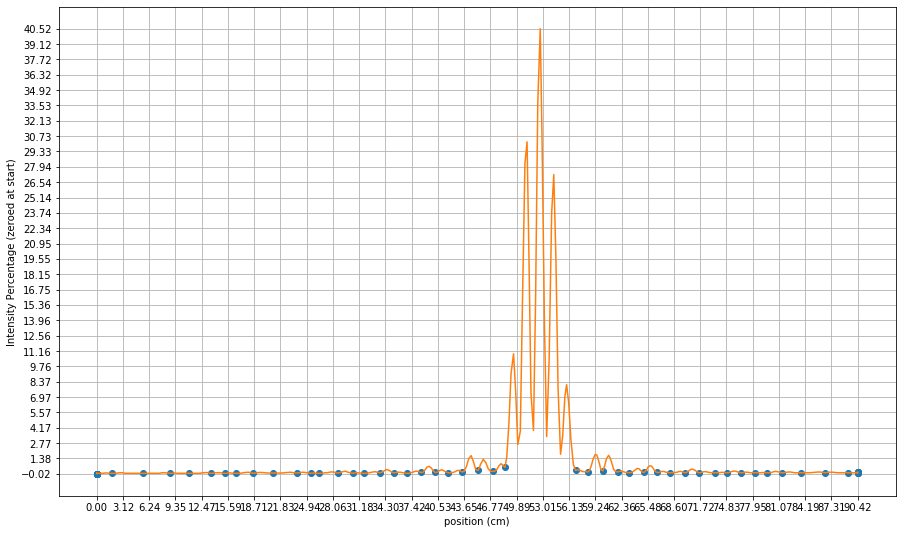

Previous threshold = 0.938860146520105
New Threshold = .5


<Figure size 432x288 with 0 Axes>

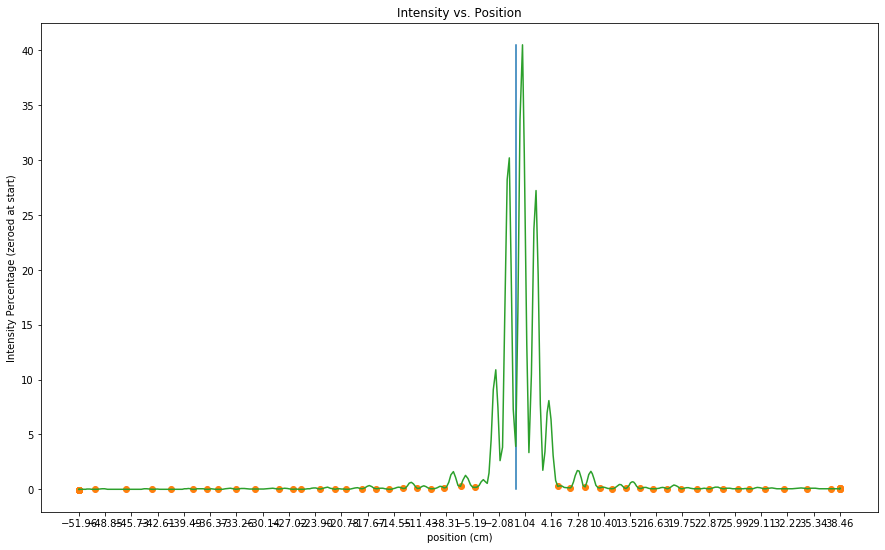

51.96416564375
Is this half point correct? (y/n)n


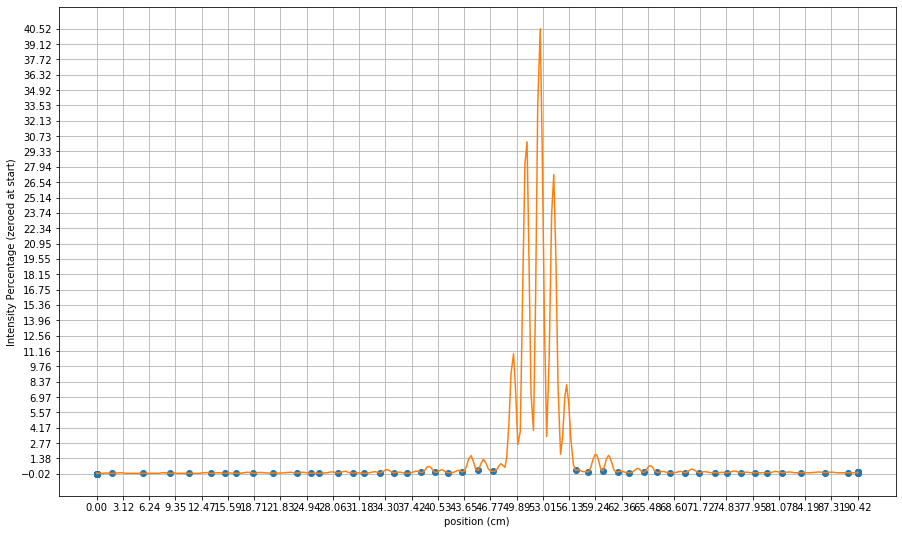

Previous threshold = 0.5
New Threshold = .3


<Figure size 432x288 with 0 Axes>

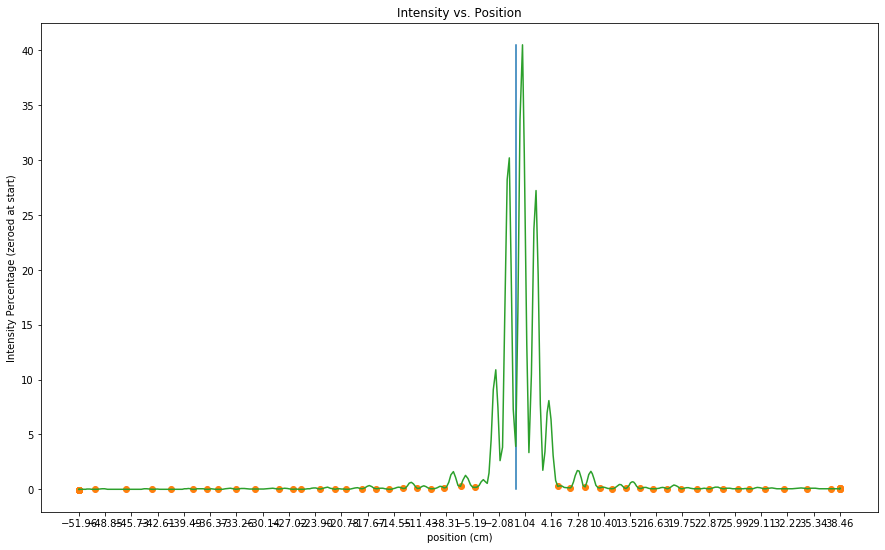

51.96416564375
Is this half point correct? (y/n)n


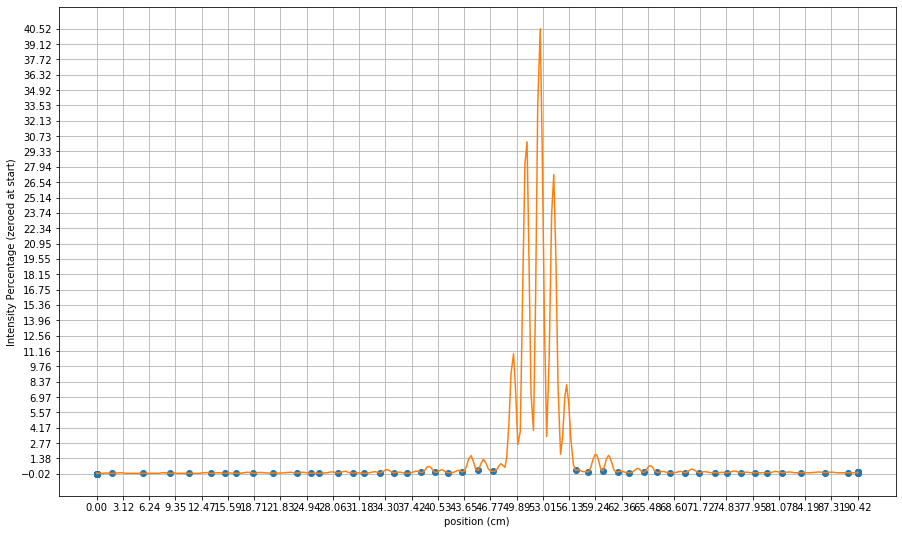

Previous threshold = 0.3
New Threshold = .24


<Figure size 432x288 with 0 Axes>

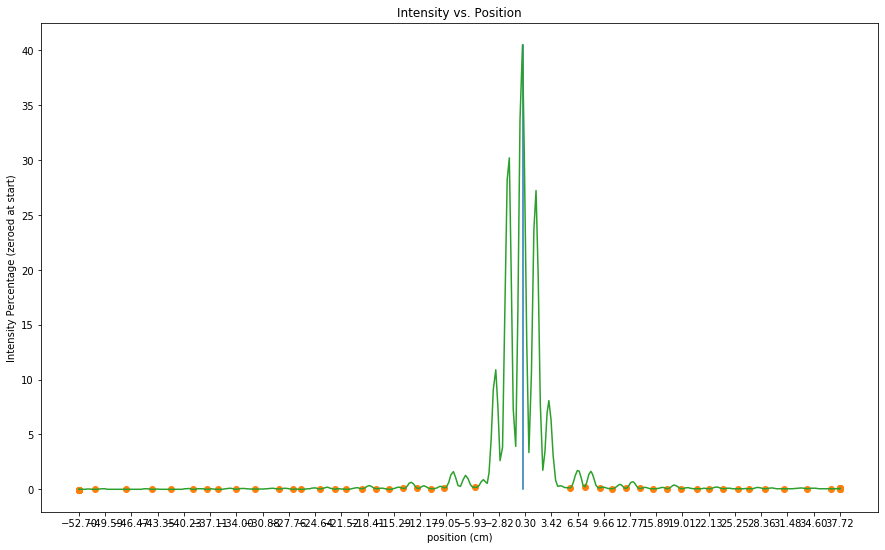

52.7049989625
Is this half point correct? (y/n)y
diffraction_slit_10


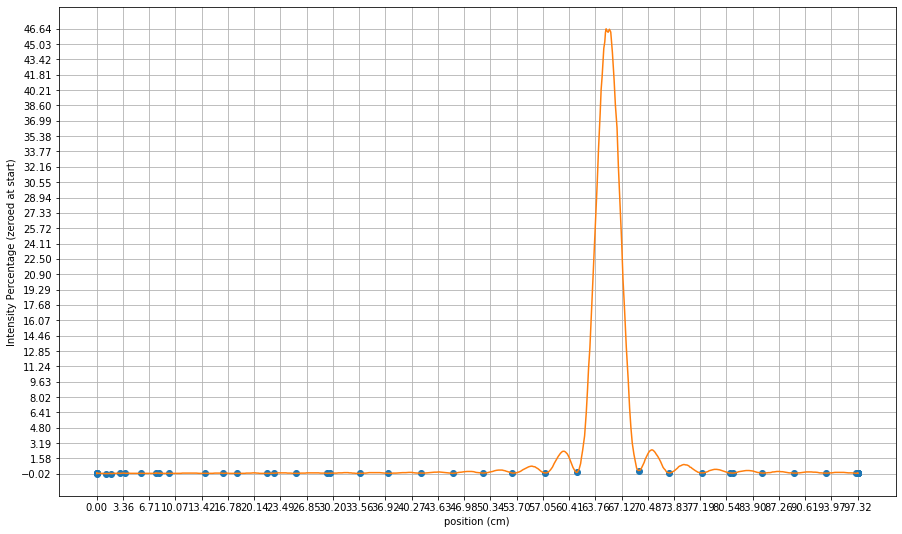

Previous threshold = 0.9999117216117472
New Threshold = 5


<Figure size 432x288 with 0 Axes>

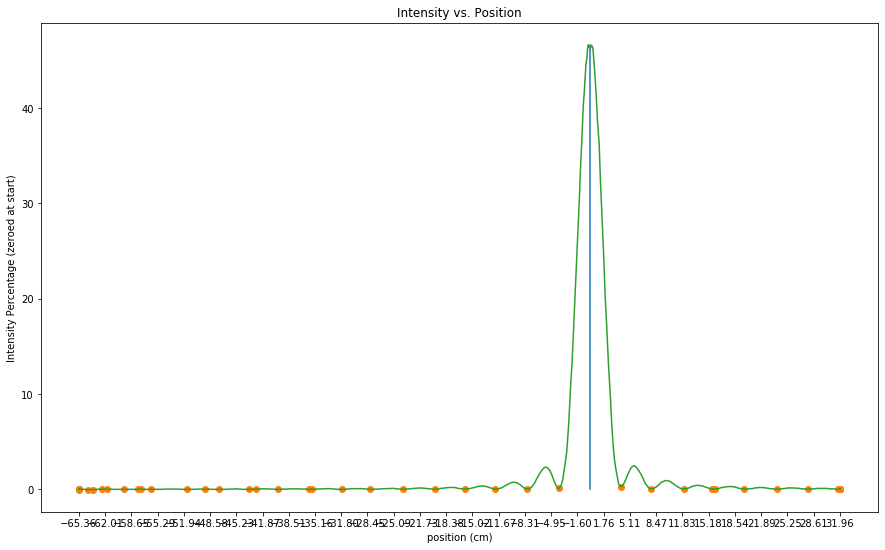

65.36266538000001
Is this half point correct? (y/n)y
diffraction_slit_1


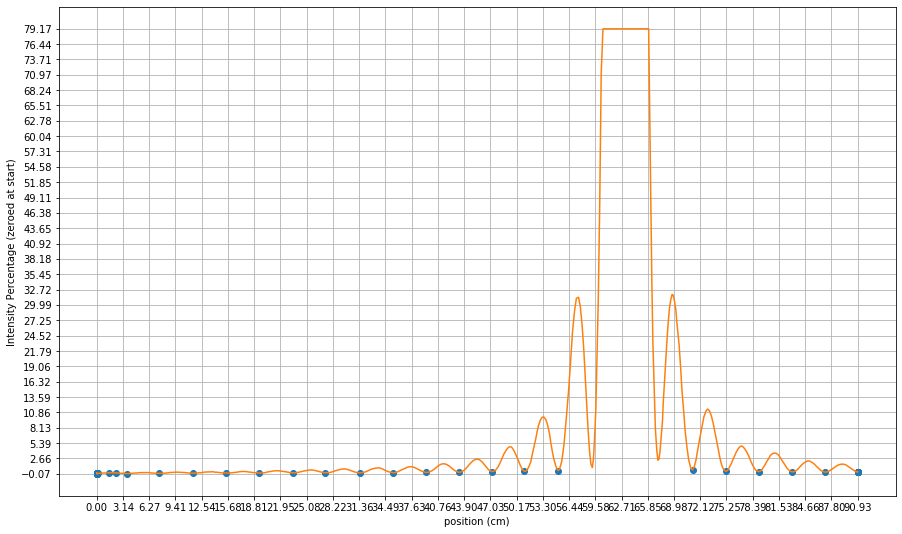

Previous threshold = 0.29301172161129996
New Threshold = 5


<Figure size 432x288 with 0 Axes>

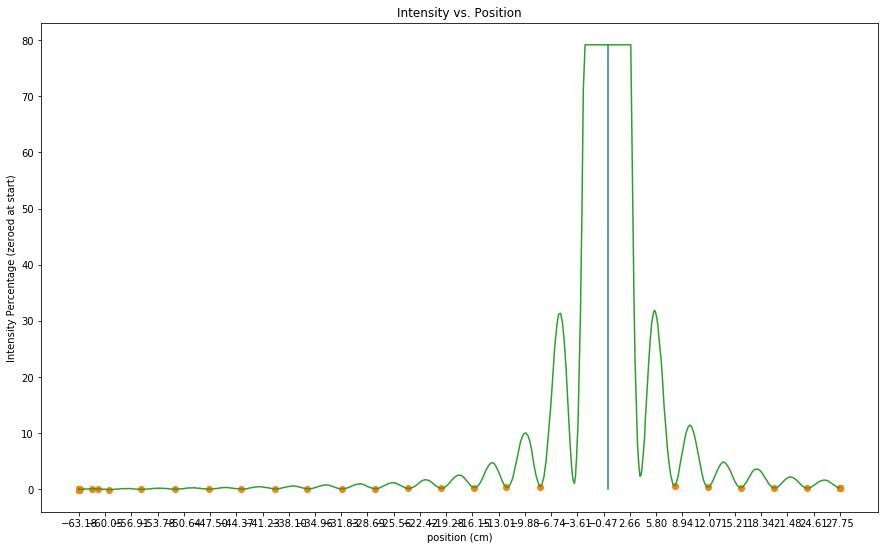

63.18249875625
Is this half point correct? (y/n)y
diff_derekhair_10


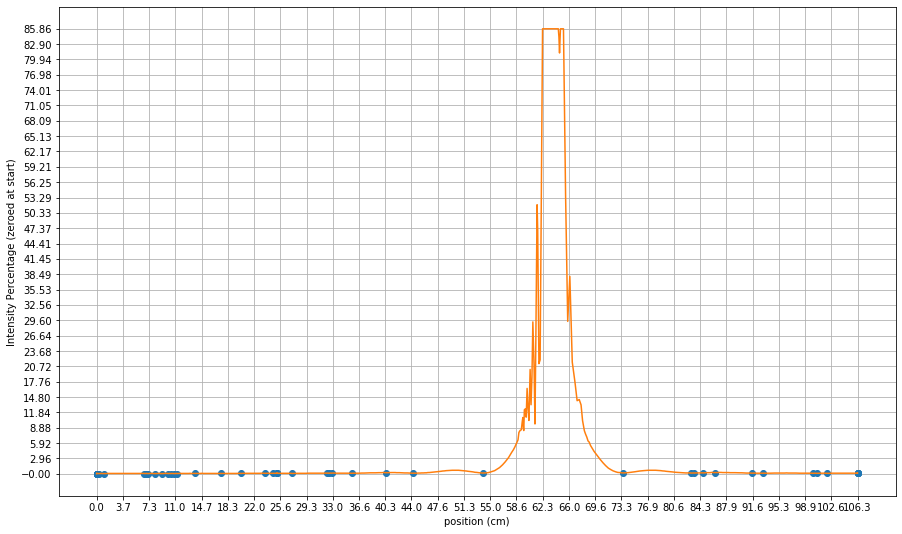

Previous threshold = 1.02433216117216
New Threshold = 5


<Figure size 432x288 with 0 Axes>

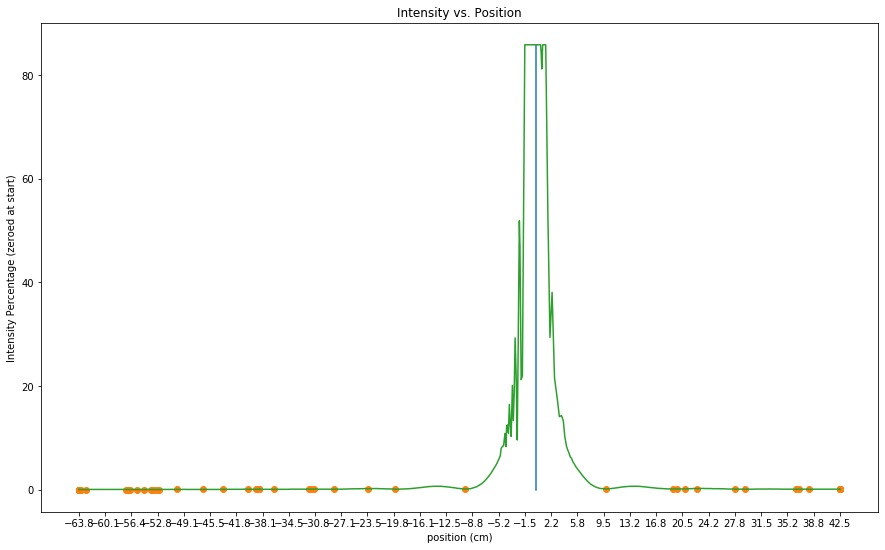

63.77516541125
Is this half point correct? (y/n)y
diff_derekhair_1


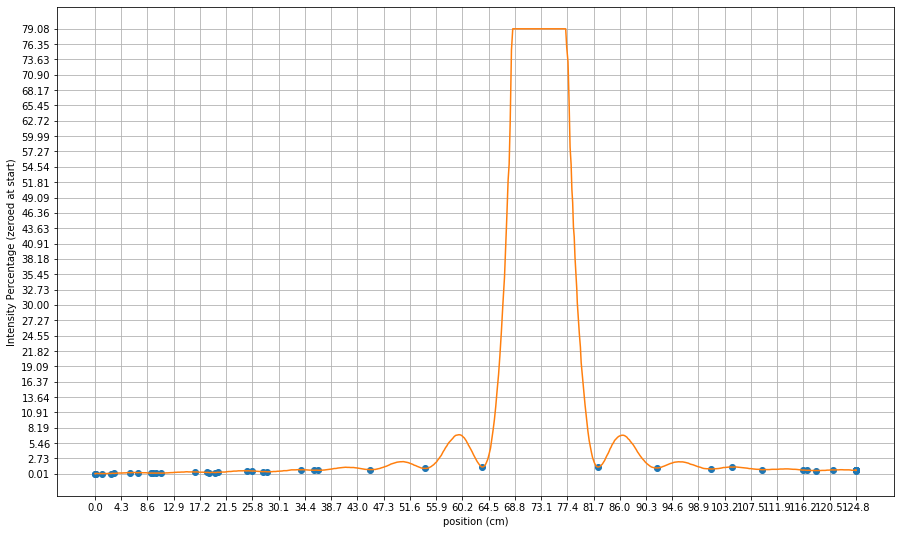

Previous threshold = 1.2679340659341398
New Threshold = 5


<Figure size 432x288 with 0 Axes>

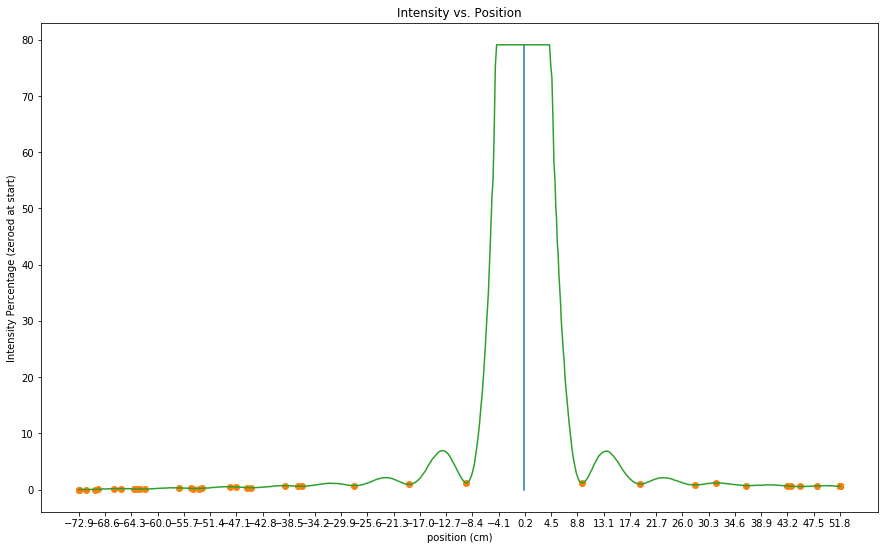

72.91916523124999
Is this half point correct? (y/n)y
diff_jacksonhair_10


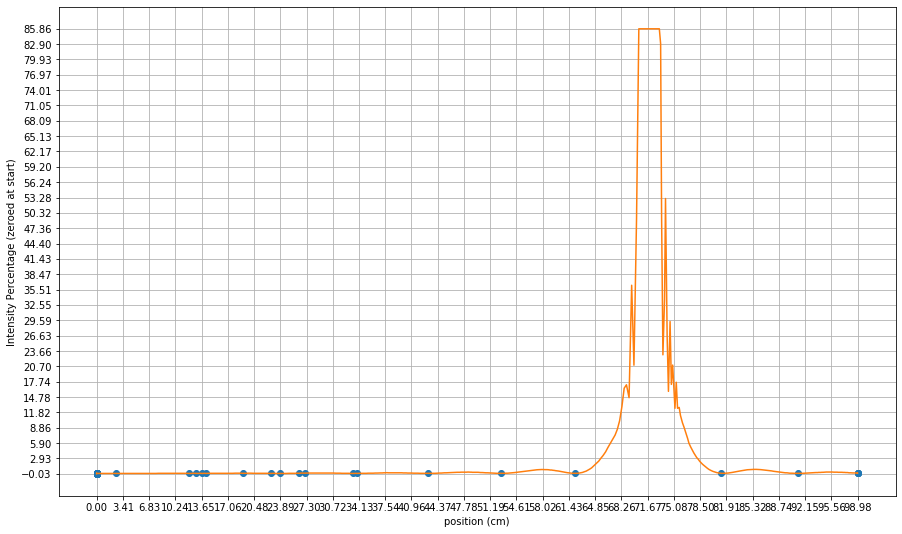

Previous threshold = 1.02433216117216
New Threshold = 5


<Figure size 432x288 with 0 Axes>

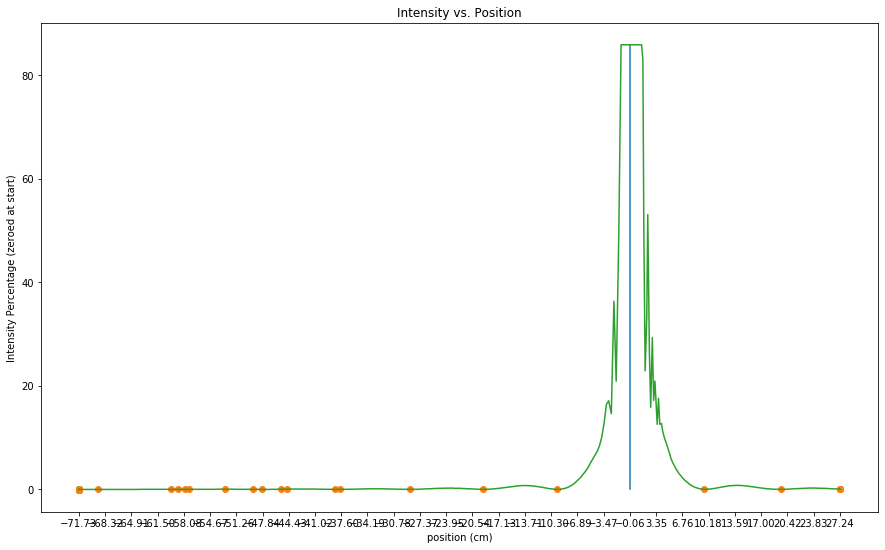

71.73383192125
Is this half point correct? (y/n)y
diff_jacksonhair_1


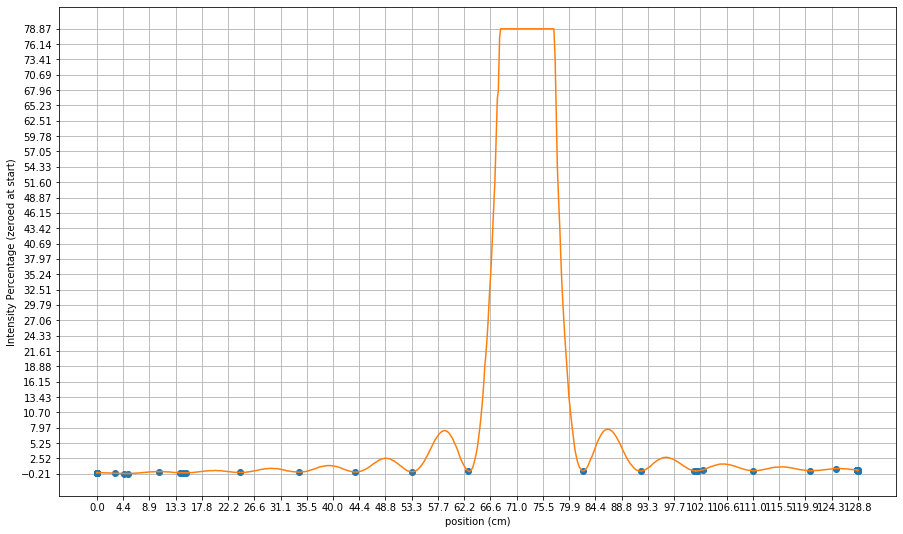

Previous threshold = 0.3518263736260001
New Threshold = 5


<Figure size 432x288 with 0 Axes>

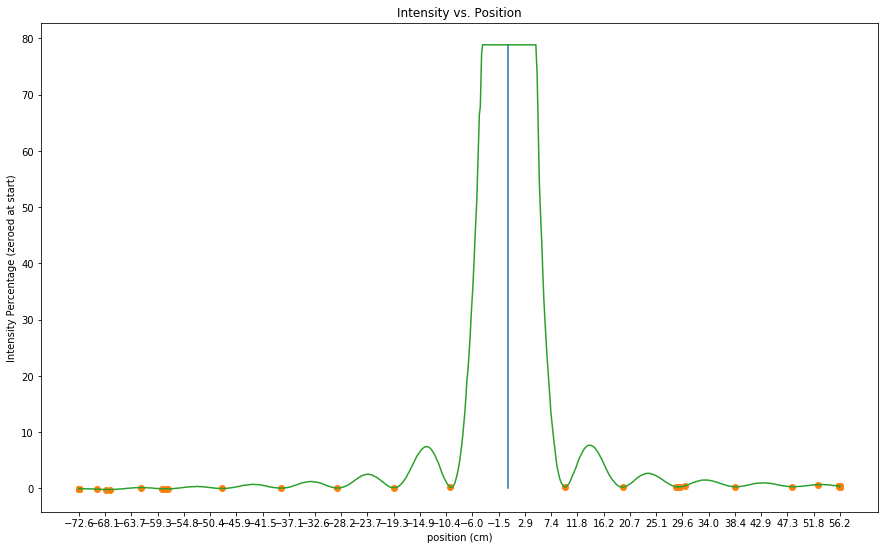

72.58049857125
Is this half point correct? (y/n)y


In [217]:
sheet_names = ["08_50_", "04_25_", "04_50_", "08_25_", "diffraction_slit_", "diff_derekhair_", "diff_jacksonhair_"]
#half_point_list = []

def index_finder():
    ptpdistance = 0
    
    ptp_epic = [position[peaks[i+1]] - position[peaks[i]] for i in range(0,len(peaks)-1)]
    ptp_epic.sort()
    for i, peak_i in enumerate(peaks):
        #print(peak_i)
        if i < len(peaks)-1:
            ptpdistance_temp = position[peaks[i+1]] - position[peaks[i]]
        ptpdistance = max(ptpdistance, ptpdistance_temp)
        ptpd_list.append(ptpdistance)
        #print(ptpdistance)
        if ptpdistance > ptp_epic[-2]: #larger than second highest
            #print("peak distance found")
            lower_index = peak_i
            higher_index = peaks[i+1]
            #print(peak_i)
            break
            
    return lower_index, higher_index

for sheet_name in sheet_names:
    for i in [10, 1]:
        print(f"{sheet_name}{i}")
        data = pd.read_excel("Lab4.xlsx", sheet_name = f"{sheet_name}{i}")
        time, position, intensity = data["time"], data["position"], data["intensity"]
        peaks = fpeaks(-intensity)
        peaks = [peak for peak in peaks[0] if intensity[peak] < 15*np.average(intensity[0:10])+1.5]
        
        user_input = "n"
        half_point = 0
        position_edited = position
        threshold = 15*np.average(intensity[0:10])+1
        while user_input == "n":
            
            if user_input == "q":
                break
            #half_point = .5 * (position[higher_index] + position[lower_index])
            #print(half_point)
            #position_edited = position - half_point
            plt.figure(figsize=(15,9))
            #plt.plot([0,0],[0,max(intensity)])
            plt.plot(position[peaks], intensity[peaks], 'o')
            plt.xlabel("position (cm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
            plt.plot(position, intensity)
            plt.yticks([i for i in np.linspace(min(intensity), max(intensity), 30)])
            plt.xticks([i for i in np.linspace(min(position), max(position), 30)])
            plt.grid()
            plt.show()
            plt.clf()
            
            print(f"Previous threshold = {threshold}")
            #half_point = float(input("Enter Half Point: "))
            threshold = float(input("New Threshold = "))
            peaks = [peak for peak in peaks if intensity[peak] < threshold]
            lower_index, higher_index = index_finder()
            
            half_point = .5 * (position[higher_index] + position[lower_index])
            
            
            position_edited = position - half_point
            plt.figure(figsize=(15,9))
            plt.plot([0,0],[0,max(intensity)])
            plt.plot(position_edited[peaks], intensity[peaks], 'o')
            plt.xlabel("position (cm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
            plt.plot(position_edited, intensity)
            plt.xticks([i for i in np.linspace(min(position_edited), max(position_edited), 30)])
            plt.title("Intensity vs. Position")
            plt.show()
            
            print(half_point)
            user_input = input("Is this half point correct? (y/n)")
            
        half_point_list.append(half_point)
    
        
#         plt.figure(figsize=(15,9))
#         #plt.plot([0,0],[0,max(intensity)])
#         plt.plot(position[peaks], intensity[peaks], 'o')
#         plt.xlabel("position (cm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
#         plt.plot(position, intensity)

In [218]:
print(half_point_list)

half_list = [45.5083324375, 50.18616567875, 47.56149906375, 45.2543324425, 42.417999165, 38.184665915, 
             43.11649915125, 52.7049989625, 65.36266538000001, 63.18249875625, 63.77516541125, 
             72.91916523124999, 71.73383192125, 72.58049857125]

[45.5083324375, 50.18616567875, 47.56149906375, 45.2543324425, 42.417999165, 38.184665915, 43.11649915125, 52.7049989625, 65.36266538000001, 63.18249875625, 63.77516541125, 72.91916523124999, 71.73383192125, 72.58049857125]


In [162]:
peaks = [peak for peak in peaks if intensity[peak] < threshold]

In [175]:
index_finder(4)




IndexError: list index out of range

In [247]:
half_list = [45.5083324375, 50.18616567875, 47.56149906375, 45.2543324425, 42.417999165, 38.184665915, 
             43.11649915125, 52.7049989625, 65.36266538000001, 63.18249875625, 63.77516541125, 
             72.91916523124999, 71.73383192125, 72.58049857125]
sheet_names = ["08_50_", "04_25_", "04_50_", "08_25_", "diffraction_slit_", "diff_derekhair_", "diff_jacksonhair_"]

j = 0
for sheet_name in sheet_names:
    for i in [10, 1]:
        if j <= 7:
            info = sheet_name.split("_")
            a = "0." + info[1] + "mm"
            w = "0." + info[0] + "mm"
            gain = f"{i}" + "W"
        print(f"{sheet_name}{i}")
        data = pd.read_excel("Lab4.xlsx", sheet_name = f"{sheet_name}{i}")
        time, position, intensity = data["time"], data["position"], data["intensity"]

        position = position - half_point_list[j]
        #start, stop = position.index(min(position))
        plt.figure(figsize=(15,9))
        #plt.plot([0,0],[0,max(intensity)])
        plt.xlabel("position (mm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
        plt.plot(position, intensity)
        plt.xlim(min(position), -min(position))
        #plt.xticks([i for i in np.linspace(min(position_edited), max(position_edited), 30)])
        if j <= 7:
            plt.title(f"Intensity vs. Position (a = {a}, w = {w}, gain = {gain})")

        if j == 8 or j == 9:
            plt.title(f"Intensity vs. Position (D = 0.16 mm)")
            
        if j == 12 or j == 13:
            plt.title(f"Intensity vs. Position (Jackson's hair)")
        plt.show()
        #plt.savefig(f"{sheet_name}{i}")
        plt.clf()
        
        j += 1
    


08_50_10
08_50_1
04_25_10
04_25_1
04_50_10
04_50_1
08_25_10
08_25_1
diffraction_slit_10
diffraction_slit_1
diff_derekhair_10
diff_derekhair_1
diff_jacksonhair_10
diff_jacksonhair_1


<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

(-30, 30)

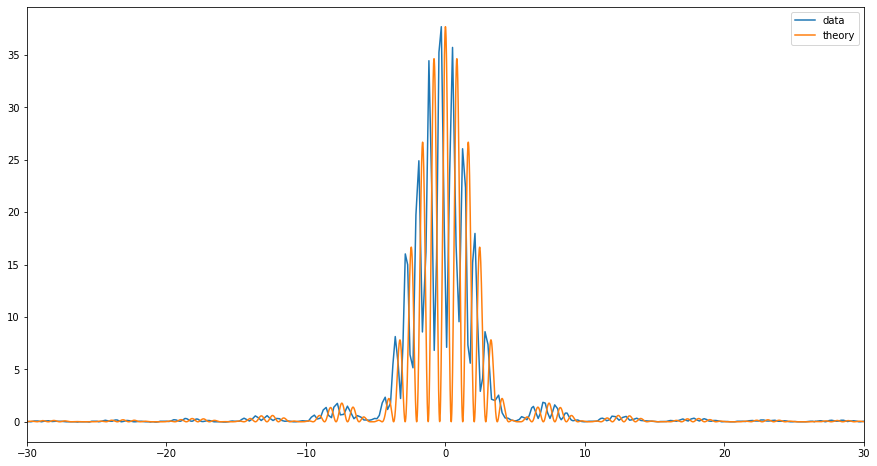

In [268]:
def eq3(a, w, position, I0 = 1):
    x = np.linspace(min(position), max(position) ,1e4)
    d = 2*np.pi*a*x / (635e-6 * 650)
    a = np.pi * w * x / (635e-6 * 650)
    
    return I0 * (np.cos(d/2))**2 * (np.sin(a) / a)**2, x

data = pd.read_excel("Lab4.xlsx", sheet_name = f"08_50_10")
time, position, intensity = data["time"], data["position"], data["intensity"]

position = position - half_point_list[0]

info = "08_50_10".split("_")
a_f = float("0." + info[1])
w_f = float("0." + info[0])

I, x = eq3(a = a_f, w = w_f, position = position, I0 = max(intensity))


plt.figure(figsize = (15, 8))
plt.plot(position, intensity, label = "data")
plt.plot(x, I, label = "theory")
plt.legend()
plt.xlim(-30,30)

In [306]:
half_list = [45.5083324375, 50.18616567875, 47.56149906375, 45.2543324425, 42.417999165, 38.184665915, 
             43.11649915125, 52.7049989625, 65.36266538000001, 63.18249875625, 63.77516541125, 
             72.91916523124999, 71.73383192125, 72.58049857125]
sheet_names = ["08_50_", "04_25_", "04_50_", "08_25_", "diffraction_slit_", "diff_derekhair_", "diff_jacksonhair_"]

def eq3(a, w, position, I0 = 1):
    x = np.linspace(min(position), max(position) ,1e4)
    d = 2*np.pi*a*x / (635e-6 * 650)
    a = np.pi * w * x / (635e-6 * 650)
    
    return I0 * (np.cos(d/2))**2 * (np.sin(a) / a)**2, x

j = 0
for sheet_name in sheet_names:
    for i in [10, 1]:
        if j <= 7:
            info = sheet_name.split("_")
            a = "0." + info[1] + "mm"
            w = "0." + info[0] + "mm"
            gain = f"{i}" + "W"
        else:
            continue
        print(f"{sheet_name}{i}")
        data = pd.read_excel("Lab4.xlsx", sheet_name = f"{sheet_name}{i}")
        time, position, intensity = data["time"], data["position"], data["intensity"]

        position = position - half_point_list[j]
        #start, stop = position.index(min(position))
        plt.figure(figsize=(15,9))
        
        info = f"{sheet_name}{i}".split("_")
        a_f = float("0." + info[1])
        w_f = float("0." + info[0])

        I, x = eq3(a = a_f, w = w_f, position = position, I0 = max(intensity))

        plt.plot(x, I, label = "theory")
        plt.legend()
        plt.xlim(-30,30)
        
        
        
        #plt.plot([0,0],[0,max(intensity)])
        plt.xlabel("position (mm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
        plt.plot(position, intensity, label = "data")
        plt.xlim(min(position), -min(position))
        #plt.xticks([i for i in np.linspace(min(position_edited), max(position_edited), 30)])
        plt.title(f"Intensity vs. Position (a = {a}, w = {w}, gain = {gain})")
        plt.legend()
        plt.xlim(-30,30)
        #plt.show()
        plt.savefig(f"{sheet_name}{i}")
        plt.clf()
        
        j += 1
    



08_50_10
08_50_1
04_25_10
04_25_1
04_50_10
04_50_1
08_25_10
08_25_1


<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

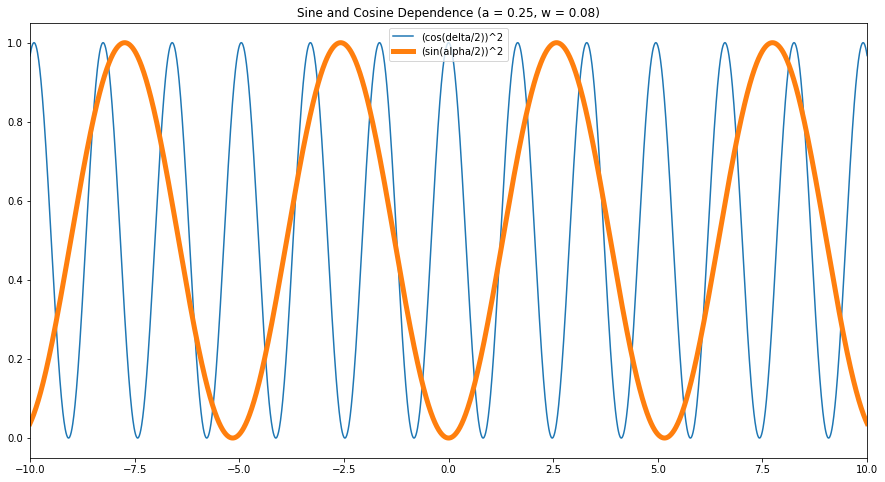

In [305]:
a = 0.25
w = 0.08
x = np.linspace(min(position), max(position) ,1e4)
d = 2*np.pi*a*x / (635e-6 * 650)
a = np.pi * w * x / (635e-6 * 650)
    
cos = np.cos(d/2)**2
sin = np.sin(a)**2
sin_a = np.sin(a)**2 / a / a

plt.figure(figsize = (15,8))
plt.plot(x, cos, label = "(cos(delta/2))^2")
plt.plot(x, sin, label = "(sin(alpha/2))^2", linewidth = 5)
#plt.plot(x, 5*sin_a, label = "5 * (sin(alpha/2) / a)^2")
plt.title(f"Sine and Cosine Dependence (a = {0.25}, w = {w})")
plt.xlim(-10,10)
plt.legend()

diff_jacksonhair_10


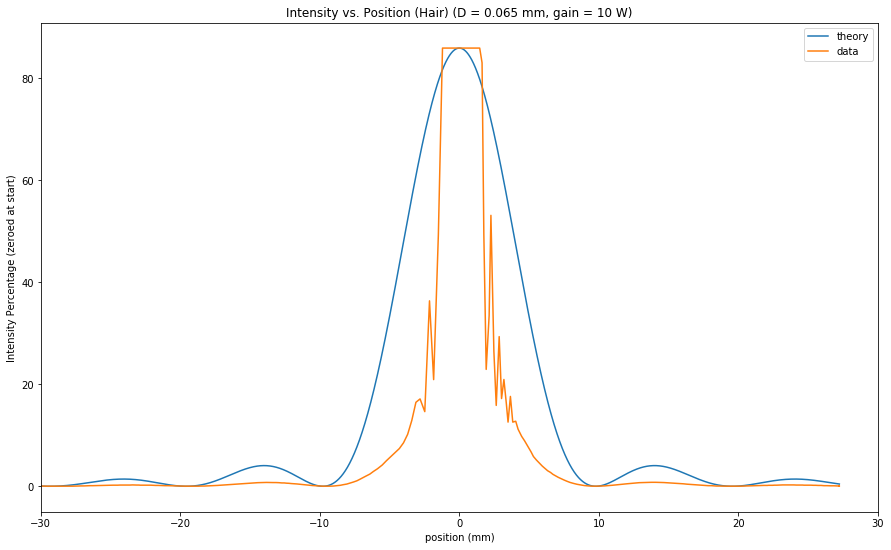

diff_jacksonhair_1


<Figure size 432x288 with 0 Axes>

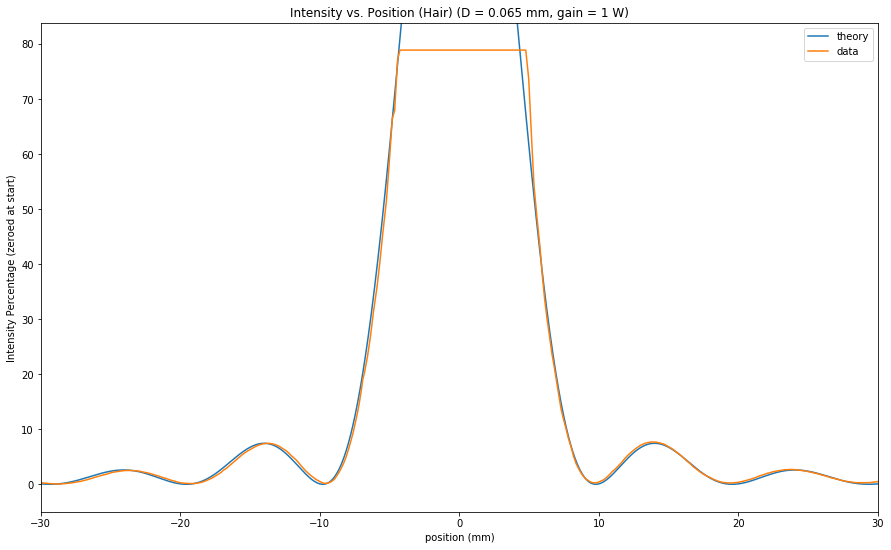

<Figure size 432x288 with 0 Axes>

In [338]:
half_list = [45.5083324375, 50.18616567875, 47.56149906375, 45.2543324425, 42.417999165, 38.184665915, 
             43.11649915125, 52.7049989625, 65.36266538000001, 63.18249875625, 63.77516541125, 
             72.91916523124999, 71.73383192125, 72.58049857125]
sheet_names = ["08_50_", "04_25_", "04_50_", "08_25_", "diffraction_slit_", "diff_derekhair_", "diff_jacksonhair_"]

def eq4(D, position, I0 = 1):
    x = np.linspace(min(position), max(position) ,1e4)
    k = 2*np.pi / 636e-6
    b = k * D / 2 * x / 1000
    
    return I0 * (np.sin(b) / b)**2, x

j = 0
for sheet_name in sheet_names:
    for i in [10, 1]:
        if j >= 12 and j <= 13:
            info = sheet_name.split("_")
            a = "0." + info[1] + "mm"
            w = "0." + info[0] + "mm"
            gain = f"{i}" + "W"
        else:
            j+=1
            continue
        print(f"{sheet_name}{i}")
        data = pd.read_excel("Lab4.xlsx", sheet_name = f"{sheet_name}{i}")
        time, position, intensity = data["time"], data["position"], data["intensity"]

        position = position - half_point_list[j]
        #start, stop = position.index(min(position))
        plt.figure(figsize=(15,9))
        
#         info = f"{sheet_name}{i}".split("_")
#         a_f = float("0." + info[1])
#         w_f = float("0." + info[0])
        if j == 12:
            I0 = max(intensity)
        else:
            I0 = max(intensity) * 2
        D = .065
        I, x = eq4(D = D, position = position, I0 = I0)

        plt.plot(x, I, label = "theory")
        plt.legend()
        plt.xlim(-30,30)
        
        
        
        #plt.plot([0,0],[0,max(intensity)])
        plt.xlabel("position (mm)"); plt.ylabel("Intensity Percentage (zeroed at start)")
        plt.plot(position, intensity, label = "data")
        plt.xlim(min(position), -min(position))
        #plt.xticks([i for i in np.linspace(min(position_edited), max(position_edited), 30)])
        plt.title(f"Intensity vs. Position (Hair) (D = {D} mm, gain = {i} W)")
        plt.legend()
        plt.xlim(-30,30)
        plt.ylim(-5, max(intensity)+5)
        plt.show()
        #plt.savefig(f"{sheet_name}{i}")
        plt.clf()
        
        j += 1
    


